<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/socio_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('/content/(3)_NL_EVsurvey_data_EN_datavalues.csv')

In [15]:
# Define a mapping dictionary
mapping = {1: 1, 2: 1, 3: 0, 99999997: 0}

# Apply the mapping to the target variable
df['nQ16'] = df['nQ16'].map(mapping)

In [80]:
X=df[[
 'nAgeCat',
 'xHighLevEdu',
 'nIncCat',
 'nProv',
 'nGen',
 'nEdu',
 'nReg']]
y=df['nQ16']

In [47]:
chi_scores = chi2(X,y)

In [48]:
chi_scores

(array([1.04623063e+01, 8.81361113e+01, 2.31649406e-03, 1.45579788e+00,
        1.33510291e+00, 2.42229151e+01, 1.12417075e+00]),
 array([1.21835078e-03, 6.11018987e-21, 9.61612661e-01, 2.27599908e-01,
        2.47899429e-01, 8.58052739e-07, 2.89022152e-01]))

In [49]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

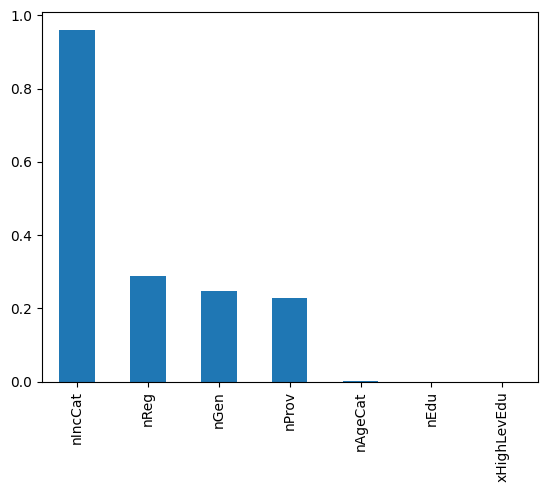

In [50]:
p_values.plot.bar()

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd



# Modello Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Importanza delle feature
importances = clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)



       Feature  Importance
3        nProv    0.241501
0      nAgeCat    0.199388
1  xHighLevEdu    0.166272
2      nIncCat    0.144338
6         nReg    0.125010
4         nGen    0.067183
5         nEdu    0.056309


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Pipeline con scaling (opzionale, ma utile)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipe.fit(X_resampled, y_resampled)

# Coefficienti
coeffs = pipe.named_steps['logreg'].coef_[0]
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coeffs,
    'Abs_Coeff': abs(coeffs)
}).sort_values(by='Abs_Coeff', ascending=False)

print(importance_df)


       Feature  Coefficient  Abs_Coeff
1  xHighLevEdu    -0.387699   0.387699
5         nEdu    -0.177737   0.177737
6         nReg     0.110067   0.110067
3        nProv     0.076154   0.076154
2      nIncCat    -0.038626   0.038626
4         nGen    -0.025089   0.025089
0      nAgeCat    -0.001513   0.001513


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

results = []

for col in X.columns:
    X_single = X[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_single, y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
    )

    # Modello
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)



       Feature  F1 Score  ROC AUC
1  xHighLevEdu     0.589    0.676
4         nGen     0.568    0.567
0      nAgeCat     0.549    0.560
2      nIncCat     0.534    0.496
6         nReg     0.502    0.503
3        nProv     0.481    0.489
5         nEdu     0.468    0.660


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

results = []

for col in X.columns:
    X_single = X[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_single, y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)



       Feature  F1 Score  ROC AUC
1  xHighLevEdu     0.589    0.676
4         nGen     0.568    0.567
2      nIncCat     0.559    0.624
0      nAgeCat     0.549    0.552
3        nProv     0.470    0.491
5         nEdu     0.468    0.660
6         nReg     0.275    0.473


In [27]:
df2 = pd.read_csv('/content/(6)_Transnational_EVsurvey_datavalues.csv')
# Apply the mapping to the target variable
df2['Q16'] = df2['Q16'].map(mapping)

Germany

In [53]:
columnToFilter = "Country"
itemToFilter = 6

columnToFilter = columnToFilter.capitalize()


df_ger = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_Ger=df_ger[['Gender',
 'RegionGermany',
 'PunchRegionGermany',
 'EducationGermany',
 'Edu',
 'PoliticsGermany', 'Lftcat'
 ]]
y2=df_ger['Q16']

In [54]:
chi_scores2 = chi2(X_Ger,y2)

In [55]:
chi_scores2

(array([6.13998589e+00, 1.52027750e-02, 2.88104134e-01, 2.11217832e+01,
        8.01845201e+00, 3.03098845e+09, 2.38522079e+01]),
 array([1.32158368e-02, 9.01869910e-01, 5.91438015e-01, 4.31000834e-06,
        4.63031307e-03, 0.00000000e+00, 1.04022499e-06]))

In [56]:
p_values2 = pd.Series(chi_scores2[1],index = X_Ger.columns)
p_values2.sort_values(ascending = False , inplace = True)

<Axes: >

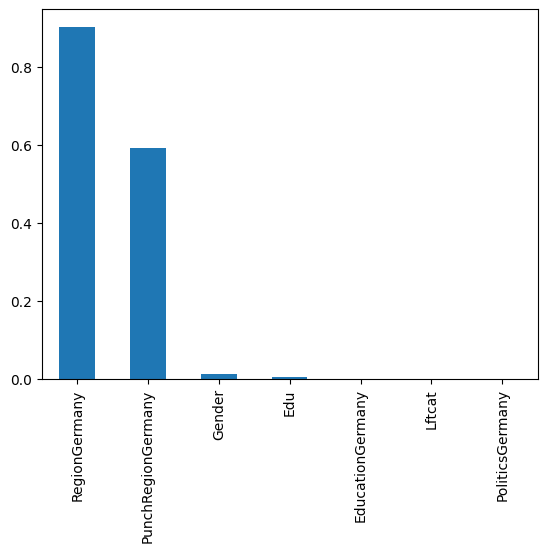

In [57]:
p_values2.plot.bar()

In [73]:
results_ger = []

for col in X_Ger.columns:
    X_Ger_single = X_Ger[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_Ger_resampled, y_Ger_resampled = smote.fit_resample(X_Ger_single, y2)

    # Split
    X_Ger_train, X_Ger_test, y_Ger_train, y_Ger_test = train_test_split(
        X_Ger_resampled, y_Ger_resampled, test_size=0.3, random_state=42, stratify=y_Ger_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_Ger_train, y_Ger_train)

    y_Ger_pred = clf.predict(X_Ger_test)
    y_Ger_proba = clf.predict_proba(X_Ger_test)[:, 1]

    f1 = f1_score(y_Ger_test, y_Ger_pred)
    roc_auc = roc_auc_score(y_Ger_test, y_Ger_proba)

    results_ger.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_Ger_df = pd.DataFrame(results_ger).sort_values(by='F1 Score', ascending=False)
print(results_Ger_df)

              Feature  F1 Score  ROC AUC
5     PoliticsGermany     0.621    0.637
0              Gender     0.585    0.595
1       RegionGermany     0.557    0.533
3    EducationGermany     0.524    0.617
6              Lftcat     0.477    0.626
4                 Edu     0.453    0.616
2  PunchRegionGermany     0.404    0.532


Hungary

In [58]:
columnToFilter = "Country"
itemToFilter = 31

columnToFilter = columnToFilter.capitalize()


df_hun = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_hun=df_hun[['Gender',
 'RegionHungary',
 'PunchRegionHungary',
 'EducationHungary',
 'Edu',
 'PoliticsHungary','Lftcat'
 ]]
y_hun=df_hun['Q16']

In [59]:
chi_scores_hun = chi2(X_hun,y_hun)

In [60]:
p_values_hun = pd.Series(chi_scores_hun[1],index = X_hun.columns)
p_values_hun.sort_values(ascending = False , inplace = True)

<Axes: >

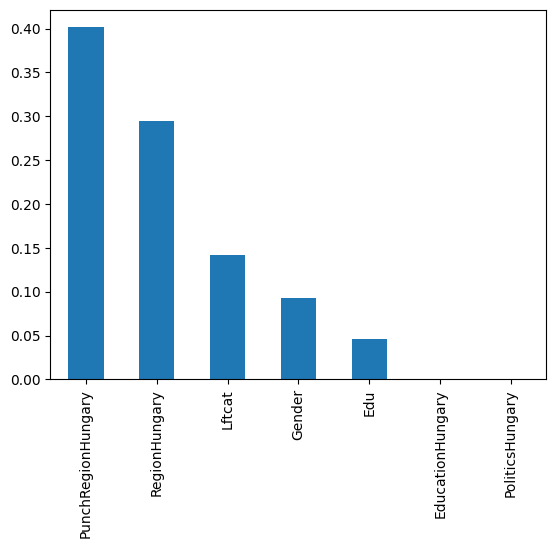

In [61]:
p_values_hun.plot.bar()

In [76]:

results_hun = []

for col in X_hun.columns:
    X_hun_single = X_hun[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_hun_resampled, y_hun_resampled = smote.fit_resample(X_hun_single, y_hun)

    # Split
    X_hun_train, X_hun_test, y_hun_train, y_hun_test = train_test_split(
        X_hun_resampled, y_hun_resampled, test_size=0.3, random_state=42, stratify=y_hun_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_hun_train, y_hun_train)

    y_hun_pred = clf.predict(X_hun_test)
    y_hun_proba = clf.predict_proba(X_hun_test)[:, 1]

    f1 = f1_score(y_hun_test, y_hun_pred)
    roc_auc = roc_auc_score(y_hun_test, y_hun_proba)

    results_hun.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_hun_df = pd.DataFrame(results_hun).sort_values(by='F1 Score', ascending=False)
print(results_hun_df)

              Feature  F1 Score  ROC AUC
5     PoliticsHungary     0.625    0.628
0              Gender     0.562    0.603
2  PunchRegionHungary     0.541    0.543
6              Lftcat     0.532    0.563
3    EducationHungary     0.531    0.571
1       RegionHungary     0.517    0.557
4                 Edu     0.373    0.559


Norway

In [63]:
columnToFilter = "Country"
itemToFilter = 36

columnToFilter = columnToFilter.capitalize()


df_nor = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_nor=df_nor[['Gender',
 'RegionNorway',
 'PunchRegionNorway',
 'EducationNorway',
 'Edu',
 'PoliticsNorway', 'Lftcat'
 ]]
y_nor=df_nor['Q16']

<Axes: >

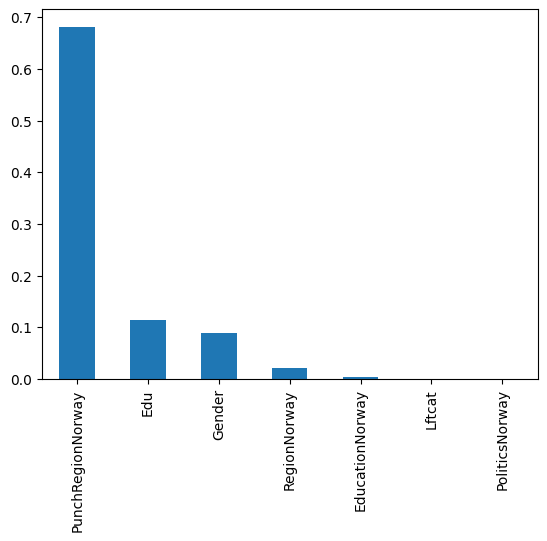

In [64]:
chi_scores_nor = chi2(X_nor,y_nor)
p_values_nor = pd.Series(chi_scores_nor[1],index = X_nor.columns)
p_values_nor.sort_values(ascending = False , inplace = True)
p_values_nor.plot.bar()

In [77]:

results_nor = []

for col in X_nor.columns:
    X_nor_single = X_nor[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_nor_resampled, y_nor_resampled = smote.fit_resample(X_nor_single, y_nor)

    # Split
    X_nor_train, X_nor_test, y_nor_train, y_nor_test = train_test_split(
        X_nor_resampled, y_nor_resampled, test_size=0.3, random_state=42, stratify=y_nor_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_nor_train, y_nor_train)

    y_nor_pred = clf.predict(X_nor_test)
    y_nor_proba = clf.predict_proba(X_nor_test)[:, 1]

    f1 = f1_score(y_nor_test, y_nor_pred)
    roc_auc = roc_auc_score(y_nor_test, y_nor_proba)

    results_nor.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_nor_df = pd.DataFrame(results_nor).sort_values(by='F1 Score', ascending=False)
print(results_nor_df)

             Feature  F1 Score  ROC AUC
5     PoliticsNorway     0.628    0.628
1       RegionNorway     0.620    0.553
0             Gender     0.532    0.551
3    EducationNorway     0.531    0.550
2  PunchRegionNorway     0.525    0.538
4                Edu     0.468    0.542
6             Lftcat     0.457    0.600


Denmark

In [66]:
columnToFilter = "Country"
itemToFilter = 37

columnToFilter = columnToFilter.capitalize()


df_den = df2[df2[columnToFilter] == itemToFilter].reset_index(drop=True)

X_den=df_den[['Gender',
 'RegionDenmark',
 'EducationDenmark',
 'Edu',
 'PoliticsDenmark', 'Lftcat'
 ]]
y_den=df_den['Q16']

<Axes: >

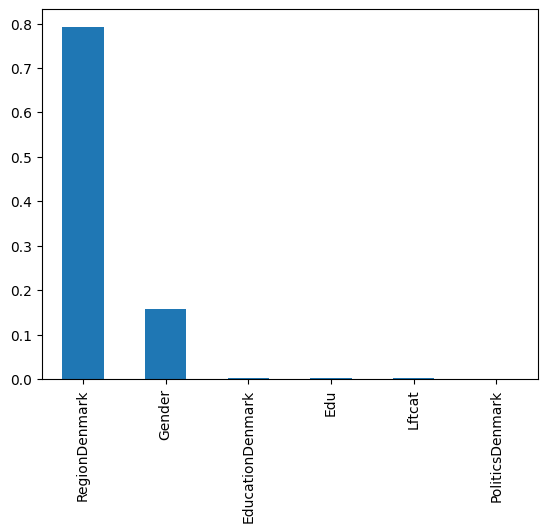

In [67]:
chi_scores_den = chi2(X_den,y_den)
p_values_den = pd.Series(chi_scores_den[1],index = X_den.columns)
p_values_den.sort_values(ascending = False , inplace = True)

p_values_den.plot.bar()

In [78]:

results_den = []

for col in X_den.columns:
    X_den_single = X_den[[col]]

    # SMOTE solo se necessario
    smote = SMOTE(random_state=42)
    X_den_resampled, y_den_resampled = smote.fit_resample(X_den_single, y_den)

    # Split
    X_den_train, X_den_test, y_den_train, y_den_test = train_test_split(
        X_den_resampled, y_den_resampled, test_size=0.3, random_state=42, stratify=y_den_resampled
    )

    # Modello
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_den_train, y_den_train)

    y_den_pred = clf.predict(X_den_test)
    y_den_proba = clf.predict_proba(X_den_test)[:, 1]

    f1 = f1_score(y_den_test, y_den_pred)
    roc_auc = roc_auc_score(y_den_test, y_den_proba)

    results_den.append({
        'Feature': col,
        'F1 Score': round(f1, 3),
        'ROC AUC': round(roc_auc, 3)
    })

# Risultati ordinati
results_den_df = pd.DataFrame(results_den).sort_values(by='F1 Score', ascending=False)
print(results_den_df)

            Feature  F1 Score  ROC AUC
3               Edu     0.651    0.592
2  EducationDenmark     0.651    0.592
4   PoliticsDenmark     0.603    0.582
1     RegionDenmark     0.548    0.517
0            Gender     0.529    0.547
5            Lftcat     0.512    0.535
